## UNSW-NB15
Preprocesamiento de los datos y cálculo de importancia de los parámetros

In [ ]:
#https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7/notebook

import pandas as pd
from sklearn import preprocessing
import time
from IPython import get_ipython
seconds = time.time()
flag = True

csv_files=["UNSW-NB15_1","UNSW-NB15_2","UNSW-NB15_3","UNSW-NB15_4"]

#Juntamos todos los datos en un solo archivo csv:
for csv_file in csv_files:
    df=pd.read_csv("./CSVs/"+ csv_file +".csv",low_memory=False)
    if flag:
        df.to_csv('all_data.csv' ,index = False)
        flag=False
    else:
        df.to_csv('all_data.csv' ,index = False,header=False,mode="a")

print("Procesamiento finalizado")
print("Tiempo total de cálculo: = ",time.time()- seconds ,"seconds")

Procesamiento finalizado
Tiempo total de cálculo: =  70.68094444274902 seconds


In [ ]:
import pandas as pd

#Leemos los nombres de las etiquetas del archivo UNSW-NB15_features.csv
df_features = pd.read_csv("./CSVs/UNSW-NB15_features.csv")
features_list = list(df_features["Name"])
features_list

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [ ]:
import pandas as pd
df = pd.read_csv("all_data.csv", names = features_list, header=None)
df.head(100)

C:\Users\pablo\AppData\Local\Temp\ipykernel_16848\3867483122.py:2: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_data.csv", names = features_list, header=None)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0.0,2,4,2,3.0,1.0,1.0,2.0,NaN,0.00
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0.0,12,8,1,2.0,2.0,1.0,1.0,NaN,0.00
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0.0,6,9,1,1.0,1.0,1.0,1.0,NaN,0.00
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0.0,7,9,1,1.0,1.0,1.0,1.0,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,175.45.176.2,43850,149.171.126.13,80,tcp,FIN,0.244832,876,9446,62,...,0.0,3,1,1,1.0,1.0,1.0,1.0,Exploits,1.00
96,59.166.0.6,45430,149.171.126.1,53,udp,CON,0.001069,130,162,31,...,0.0,12,8,2,2.0,2.0,1.0,1.0,NaN,0.00
97,59.166.0.2,39128,149.171.126.1,48372,udp,CON,0.001793,520,304,31,...,0.0,5,3,2,1.0,1.0,1.0,1.0,NaN,0.00
98,59.166.0.6,4318,149.171.126.5,53,udp,CON,0.001112,146,178,31,...,0.0,12,9,1,2.0,2.0,1.0,1.0,NaN,0.00


In [ ]:
cols_cat = df.select_dtypes('object').columns # Columnas de variables categóricas
len(cols_cat)
#Mostramos el número de variables categóricas

9

In [ ]:
cols_numeric = df._get_numeric_data().columns # Columnas de variables numéricas
len(cols_numeric)
#Mostramos el número de variables numéricas

40

In [ ]:
# Transformamos todas las columnas numéricas en float
df[cols_numeric] = df[cols_numeric].astype('float') 

In [ ]:
#Mostramos las variables categóricas:
print(cols_cat)
print(cols_cat[:-1])

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object')
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd'],
      dtype='object')


In [ ]:
#Transformamos todas aquellas columnas de variables que sean categóricas, excepto attack_cat:
from sklearn import preprocessing
labelencoder_X = preprocessing.LabelEncoder()
#df = df.drop(['ct_ftp_cmd'], axis=1) #Eliminamos esta columna ya que presenta muchos valores nulos

cols_cat = list(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd']) #Para no eliminar la etiqueta attack_cat
df[cols_cat] = df[cols_cat].astype('str') #Convertimos primero a string para que funcione el encoder
for i in cols_cat:
    df[i]=labelencoder_X.fit_transform(df[i])

df[cols_cat] = df[cols_cat].astype('float') #Transformamos los valores en float

#df = df.drop(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd'], axis=1) 

In [ ]:
pd.set_option('display.max_columns', None)
df.head()
#Ya todo son variables numéricas excepto attack_cat

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,20.0,36402.0,9.0,41496.0,53.0,14.0,0.001055,132.0,164.0,31.0,29.0,0.0,0.1,8.0,500473.93750,621800.93750,2.0,2.1,0.2,0.3,0.4,0.5,66.0,82.0,0.6,0.7,0.80000,0.900000,1.421927e+09,1.421927e+09,0.017,0.013000,0.1,0.11,0.12,0.13,0.14,0.15,0.16,6.0,3.0,7.0,1.0,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
1,20.0,17821.0,13.0,17002.0,53.0,14.0,0.036133,528.0,304.0,31.0,29.0,0.0,0.0,0.0,87676.08594,50480.17188,4.0,4.0,0.0,0.0,0.0,0.0,132.0,76.0,0.0,0.0,9.89101,10.682733,1.421927e+09,1.421927e+09,7.005,7.564333,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,NaN,0.00
2,27.0,45458.0,10.0,41496.0,53.0,14.0,0.001119,146.0,178.0,31.0,29.0,0.0,0.0,8.0,521894.53130,636282.37500,2.0,2.0,0.0,0.0,0.0,0.0,73.0,89.0,0.0,0.0,0.00000,0.000000,1.421927e+09,1.421927e+09,0.017,0.013000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,NaN,0.00
3,26.0,20596.0,8.0,41496.0,53.0,14.0,0.001209,132.0,164.0,31.0,29.0,0.0,0.0,8.0,436724.56250,542597.18750,2.0,2.0,0.0,0.0,0.0,0.0,66.0,82.0,0.0,0.0,0.00000,0.000000,1.421927e+09,1.421927e+09,0.043,0.014000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.00
4,24.0,37396.0,40.0,41496.0,53.0,14.0,0.001169,146.0,178.0,31.0,29.0,0.0,0.0,8.0,499572.25000,609067.56250,2.0,2.0,0.0,0.0,0.0,0.0,73.0,89.0,0.0,0.0,0.00000,0.000000,1.421927e+09,1.421927e+09,0.005,0.003000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,NaN,0.00


In [ ]:
print(df.isnull().sum())
#Comprobamos si hay alguna variable con elementos nulos:

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

<Axes: >

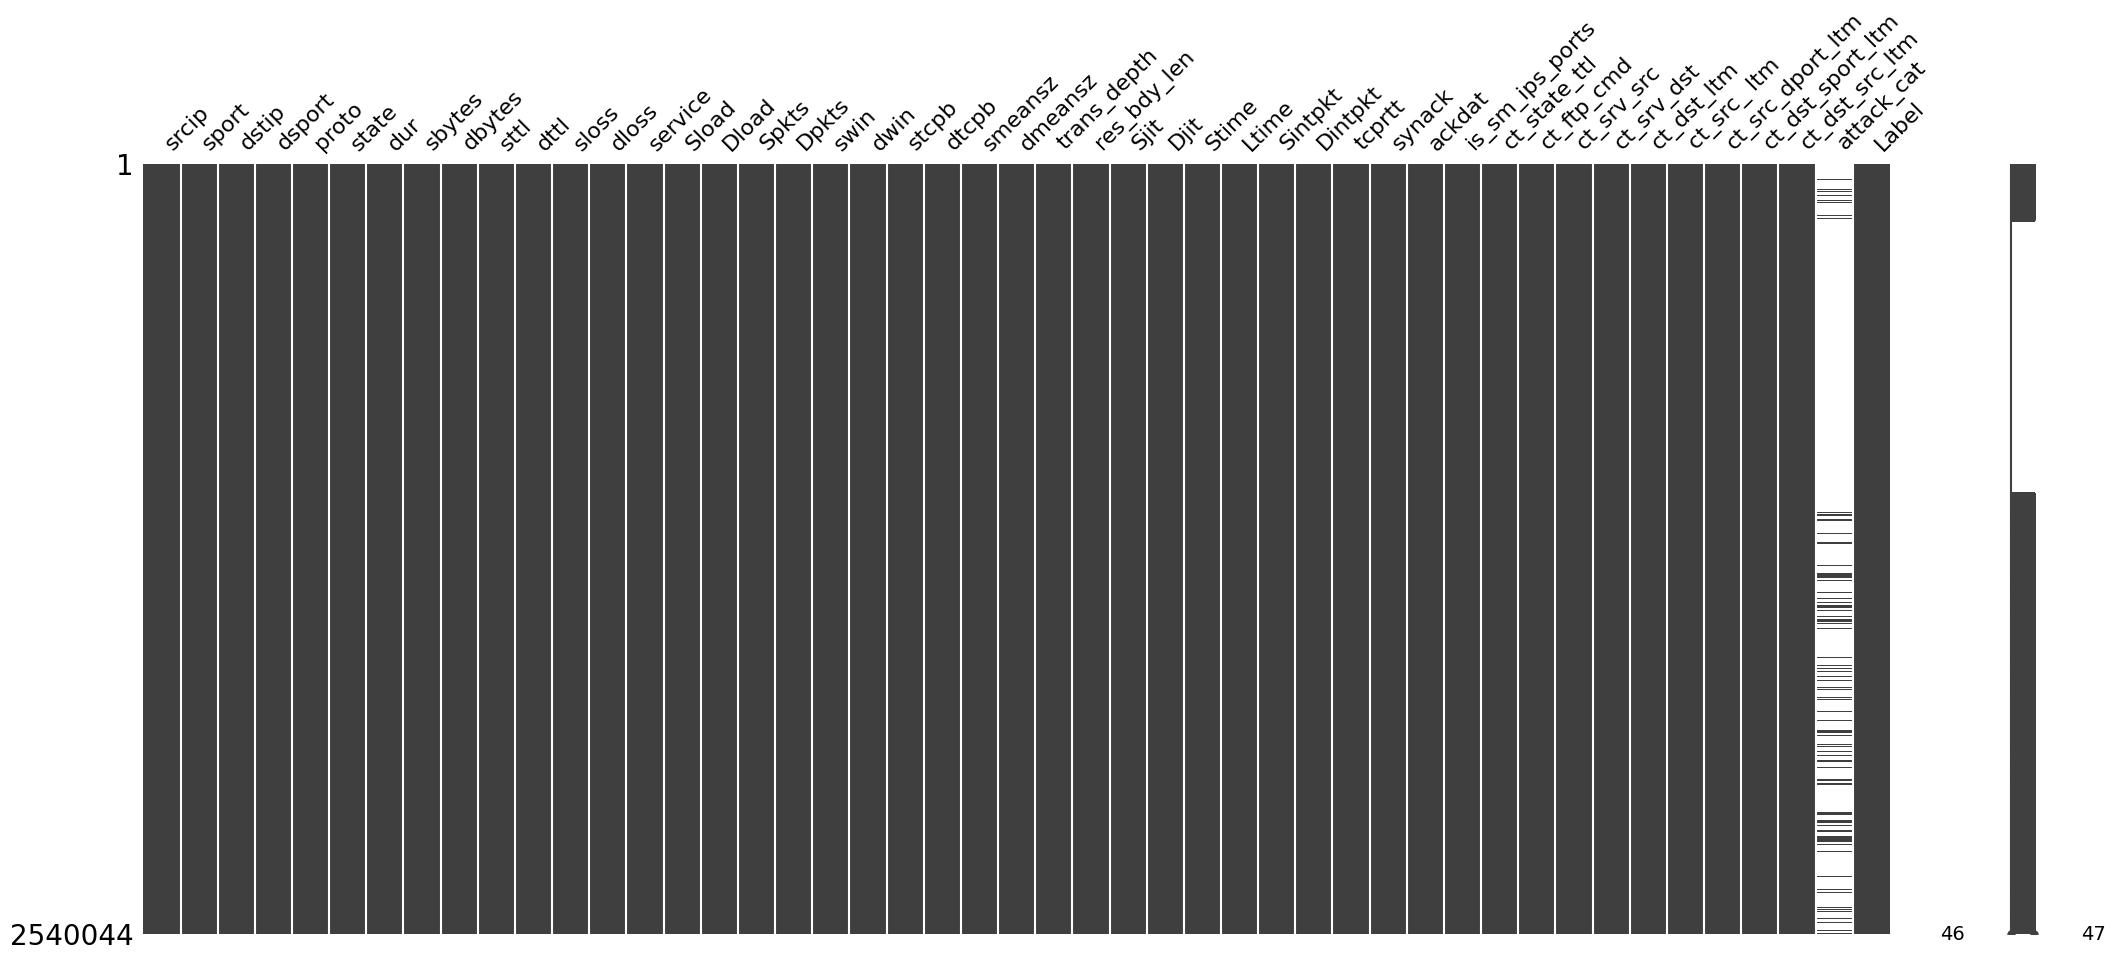

In [ ]:
import missingno
df = df.drop(['ct_flw_http_mthd','is_ftp_login'], axis=1) #Eliminamos estas columnas, que tienen demasiados elementos nulos
print(df.isnull().sum()) #Mostramos los elementos nulos par cada variable. Ya solo quedan para attack_cat
missingno.matrix(df) #Lo mostramos en forma de matriz

In [ ]:
#Imprimimos el conjunto de elementos distintos que toma la variable attack_cat
df['attack_cat'].unique()
#Vemos que hay elementos que corresponden con un mismo ataque pero están expresados ligeramente distinto

array(['Unnamed: 47', nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', ' Fuzzers', 'Worms', 'Backdoors', 'Analysis',
       ' Reconnaissance ', 'Backdoor', ' Fuzzers ', ' Shellcode '],
      dtype=object)

In [ ]:
#Eliminamos la primera fila, ya que tiene Unnamed:47 como valor de attack_cat
df = df.drop([0], axis=0)
df['attack_cat'].unique()

array([nan, 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Reconnaissance ',
       'Backdoor', ' Fuzzers ', ' Shellcode '], dtype=object)

In [ ]:
import numpy as np

#Para aquellas entradas de tráfico normal, ahora la variable attack_cat tomará el valor "BENIGN"
df['attack_cat'] = np.where(df['Label'] == 0, 'BENIGN', df['attack_cat'])
df['attack_cat'].unique()

array(['BENIGN', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', ' Fuzzers', 'Worms', 'Backdoors', 'Analysis',
       ' Reconnaissance ', 'Backdoor', ' Fuzzers ', ' Shellcode '],
      dtype=object)

In [ ]:
import numpy as np

#Arreglamos el resto de incoherencias con los nombres de ataque tomados:
df['attack_cat'] = np.where(df['attack_cat'] == ' Fuzzers', 'Fuzzers', df['attack_cat'])
df['attack_cat'] = np.where(df['attack_cat'] == ' Fuzzers ', 'Fuzzers', df['attack_cat'])
df['attack_cat'] = np.where(df['attack_cat'] == ' Reconnaissance ', 'Reconnaissance', df['attack_cat'])
df['attack_cat'] = np.where(df['attack_cat'] == ' Shellcode ', 'Shellcode', df['attack_cat'])
df['attack_cat'] = np.where(df['attack_cat'] == 'Backdoors', 'Backdoor', df['attack_cat'])
df['attack_cat'].unique()

array(['BENIGN', 'Exploits', 'Reconnaissance', 'DoS', 'Generic',
       'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis'],
      dtype=object)

attack_cat
BENIGN            2218760
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64


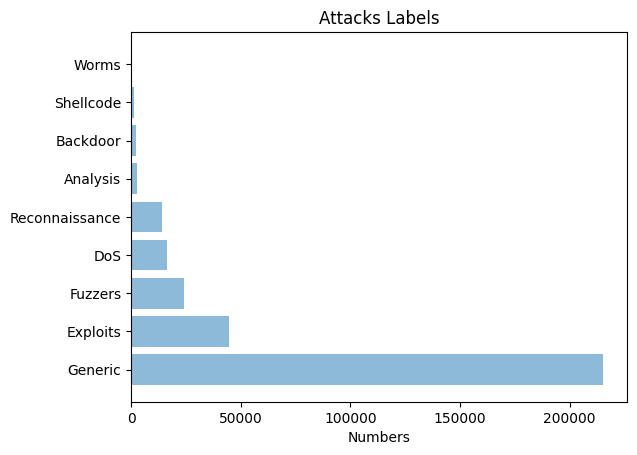

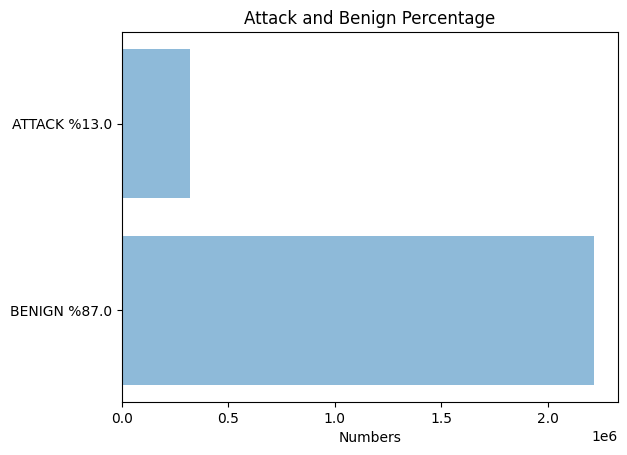

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

#Estudiamos el numero de ataques de cada tipo y la proporción ataque/benigno

def graph(objects,performance,x_label,y_label):
    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    plt.show()


attack_counts = df.iloc[:,-2].value_counts()
print(attack_counts)

keys_attacks = attack_counts.keys()[1:] #Quitamos BENIGN de la lista
values_attacks = attack_counts.values[1:]

graph(keys_attacks,values_attacks,"Numbers","Attacks Labels")


all_counts = df.iloc[:,-1].value_counts()
benign = all_counts[0]
attack = all_counts[1]
keys_all = [benign,attack]

labels=["BENIGN %"+str(round(benign/(benign+attack),2)*100),
        "ATTACK %"+str(round(attack/(benign+attack),2)*100)]
graph(labels,keys_all,"Numbers","Attack and Benign Percentage")



df = df.drop(['Label'], axis=1) #Eliminamos la columna Label, ya no nos hace falta (toda la información está en attack_cat)
df.rename(columns = {'attack_cat':'Label'}, inplace = True)  #Ahora la columna Label será igual que con el CICIDS: su tipo de ataque/Benigno
df.to_csv('all_data_preproc.csv' ,index = False) #Guardamos todos estos datos preprocesados en el fichero all_data_preproc.csv


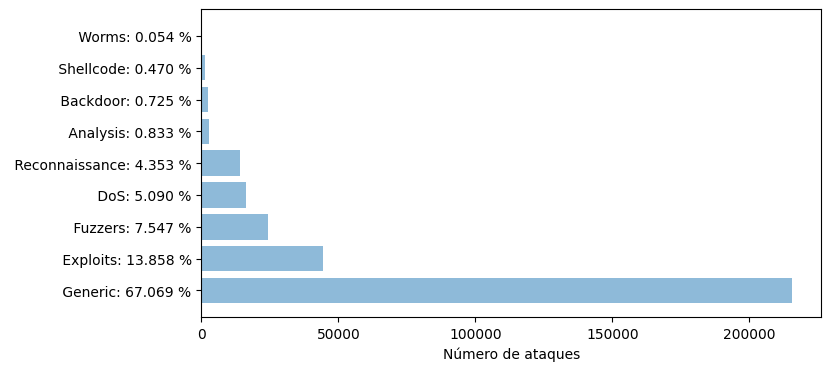

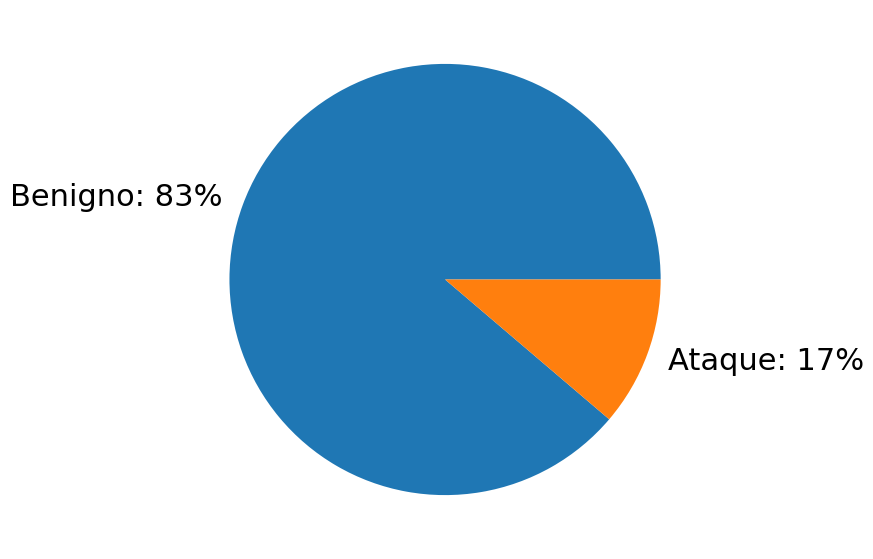

In [ ]:
##Código para obtener gráficas de las estadísticas


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def graph(objects,performance,x_label,y_label):
    plt.figure(figsize = (8,4))
    y_pos = np.arange(len(objects))
    bars = plt.barh(y_pos, performance, align='center', alpha=0.5)
    #plt.bar_label(bars)
    plt.yticks(y_pos, objects)
    plt.xlabel(x_label)
    plt.title(y_label)
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.show()

labels = ["Generic", "Exploits", "Fuzzers", "DoS", "Reconnaissance", "Analysis", "Backdoor", "Shellcode", "Worms"]
values = [215481, 44525, 24246, 16353, 13987, 2677, 2329, 1511, 174]

attacks = sum(values)
total = 2218760 + attacks

ratio = [(i/attacks)*100 for i in values]

labels_ratio = [" %s: %.3f %%"% (labels[i], ratio[i]) for i in range(9)]
#print(ratio)

valores = { "BENIGN":2218760,
            "Generic":215481,
            "Exploits":44525,
            "Fuzzers" :24246,
            "DoS":16353,
            "Reconnaissance":13987,
            "Analysis":2677,
            "Backdoor":2329,
            "Shellcode":1511,
            "Worms":174,
            }


graph(labels_ratio,values,"Número de ataques","")


fig = plt.figure(figsize=(10, 7))
plt.pie([total, attacks], labels=['Benigno: 83%','Ataque: 17%'], textprops={'fontsize': 22})
 
# show plot
plt.show()
         



In [ ]:
import pandas as pd
df=pd.read_csv('all_data_preproc.csv',low_memory=False)
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_state_ttl,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,20.0,17821.0,13.0,17002.0,53.0,14.0,0.036133,528.0,304.0,31.0,...,0.0,5.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,BENIGN
1,27.0,45458.0,10.0,41496.0,53.0,14.0,0.001119,146.0,178.0,31.0,...,0.0,5.0,12.0,8.0,1.0,2.0,2.0,1.0,1.0,BENIGN
2,26.0,20596.0,8.0,41496.0,53.0,14.0,0.001209,132.0,164.0,31.0,...,0.0,5.0,6.0,9.0,1.0,1.0,1.0,1.0,1.0,BENIGN
3,24.0,37396.0,40.0,41496.0,53.0,14.0,0.001169,146.0,178.0,31.0,...,0.0,5.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,BENIGN
4,20.0,15934.0,13.0,2248.0,53.0,14.0,0.078339,568.0,312.0,31.0,...,0.0,5.0,2.0,4.0,2.0,3.0,1.0,1.0,2.0,BENIGN


In [ ]:
len(list(df.keys()))

46

In [ ]:
list(df.keys())

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'Label']

In [ ]:
#  Se requiere el archivo all_data_preproc.csv para la ejecución de este código.
#  El archivo all_data_preproc.csv debe estar ubicado en el mismo directorio que el programa.

# El objetivo de este programa es producir varios archivos CSV de forma que en cada uno solo haya ataques de un tipo y tráfico benigno.
# Estos archivos contienen todo el tráfico de ataque y algo de tráfico benigno (30% ataque, 70% benigno)
# El tráfico normal se selecciona aleatoriamente

import random
import os
import pandas as pd
import time
seconds = time.time()


def folder(f_name): #Crea un directorio llamado con nombre f_name
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("No se pudo crear el directorio")

# Etiquetas de cada columna:
main_labels=['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 
             'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 
             'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd', 
             'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','Label']
            #La etiqueta 45 es Label

main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", 'Fuzzers', 'Shellcode', 'Analysis', 'Worms', 'Backdoor', 'Reconnaissance', 'DoS', 'Generic', 'Exploits']
folder("./attacks/")

benign=2218760 #Numero de datos de tráfico normal/benigno 

dict_attack={ #El valor del diccionario es el numero de ataques de cada tipo.
'Generic': 215481,
'Exploits': 44525,
'Fuzzers': 24246,
'DoS': 16353,
'Reconnaissance': 13987,
'Analysis': 2677,
'Backdoor': 2329,
'Shellcode': 1511,
'Worms': 174}

# En esta sección se crea un archivo para cada tipo de ataque y se guarda en él el tráfico de dicho ataque junto con un flujo benigno aleatorio
for i in dict_attack:
    a,b=0,0 #b = numero de registros benignos, a = numero de ataques
    ths = open(".\\attacks\\"+i + ".csv", "w") #Abrimos/creamos el fichero correspondiente al ataque i
    ths.write(str(main_labels)+"\n") #Escribimos las etiquetas de los parámetros
    benign_num=int(benign/(dict_attack[i]*(7/3))) #70% benignos, 30% ataques
    with open("all_data_preproc.csv", "r") as file:
        while True: #Recorremos todo el fichero all_data.csv
            try:
                line=file.readline()    #Leemos línea a línea, cada registro de flujo
                line=line[:-1]          #Tomamos todos los caracteres menos el último (\n)
                k=line.split(",")       #Transforma la línea en una lista con los valores de los parámetros
                if k[45]=="BENIGN":     #Si el registro es benigno:
                    rnd=random.randint(1,benign_num) #Para evitar tomar siempre los benignos del principio, lo condicionamos con un numero aleatorio
                    if rnd==1:                       # y una probabilidad de (nºbenignos_requeridos/nºbenignos_total), que nos dará un 70-30
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[45]==i: #Si es un ataque del tipo que estamos buscando, lo tomamos siempre:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue                       
            except:
                break
    ths.close()
    print(i ,": fichero completado\n ataque:%d\n benigno:%d\n\n\n " %(a,b))


print("Procesamiento completado")
print("Tiempo de operación: = ",time.time()- seconds ,"seconds")


Generic fichero completado
 ataque:215481
 benigno:555071


 
Exploits fichero completado
 ataque:44525
 benigno:105575


 
Fuzzers fichero completado
 ataque:24246
 benigno:56533


 
DoS fichero completado
 ataque:16353
 benigno:38407


 
Reconnaissance fichero completado
 ataque:13987
 benigno:33148


 
Analysis fichero completado
 ataque:2677
 benigno:6363


 
Backdoor fichero completado
 ataque:2329
 benigno:5390


 
Shellcode fichero completado
 ataque:1511
 benigno:3494


 
Worms fichero completado
 ataque:174
 benigno:376


 
Procesamiento completado
Tiempo de operación: =  129.69511365890503 seconds


Lista de relevancia de parámetros para el ataque tipo  Analysis :
Analysis 
             importancia
Parámetros             
sttl           0.573390
dsport         0.026739
dstip          0.004418
proto          0.001617
sloss          0.001478
sbytes         0.001425
sport          0.001121
Dload          0.000656
state          0.000575
dttl           0.000561
Sload          0.000533
srcip          0.000383
dur            0.000355
service        0.000189
dbytes         0.000163
Spkts          0.000160
swin           0.000059
dwin           0.000037
Dpkts          0.000017
dloss          0.000012 



Analysis=["sttl","dsport","dstip","proto","sloss"]


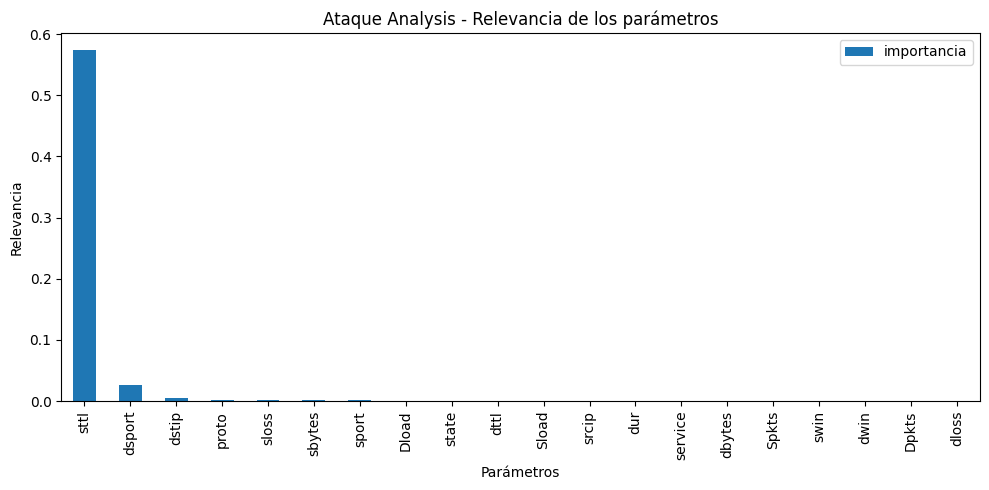

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Backdoor :
Backdoor 
             importancia
Parámetros             
sttl           0.927527
dsport         0.025598
dbytes         0.004252
Dload          0.000637
sbytes         0.000541
sport          0.000445
Sload          0.000363
srcip          0.000337
sloss          0.000317
dur            0.000251
Spkts          0.000222
dstip          0.000169
proto          0.000143
service        0.000130
dloss          0.000114
Dpkts          0.000093
state          0.000056
dttl           0.000012
swin           0.000002
dwin           0.000000 



Backdoor=["sttl","dsport","dbytes","Dload","sbytes"]


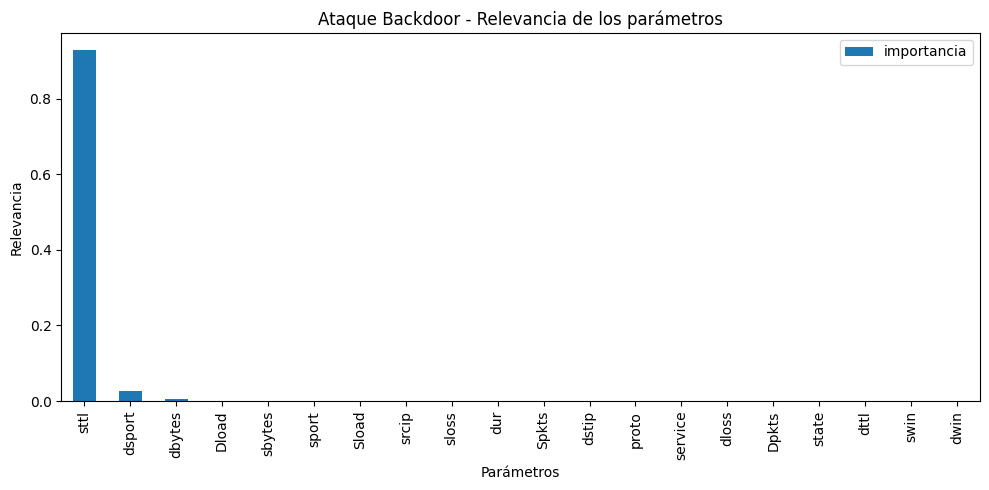

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  DoS :
DoS 
             importancia
Parámetros             
sttl           0.926416
dsport         0.025332
dbytes         0.003720
sbytes         0.001647
proto          0.001311
srcip          0.001094
Sload          0.000596
Dload          0.000555
sport          0.000555
sloss          0.000447
dur            0.000334
dstip          0.000288
Spkts          0.000253
Dpkts          0.000252
service        0.000244
state          0.000117
dloss          0.000063
swin           0.000034
dttl           0.000012
dwin           0.000003 



DoS=["sttl","dsport","dbytes","sbytes","proto"]


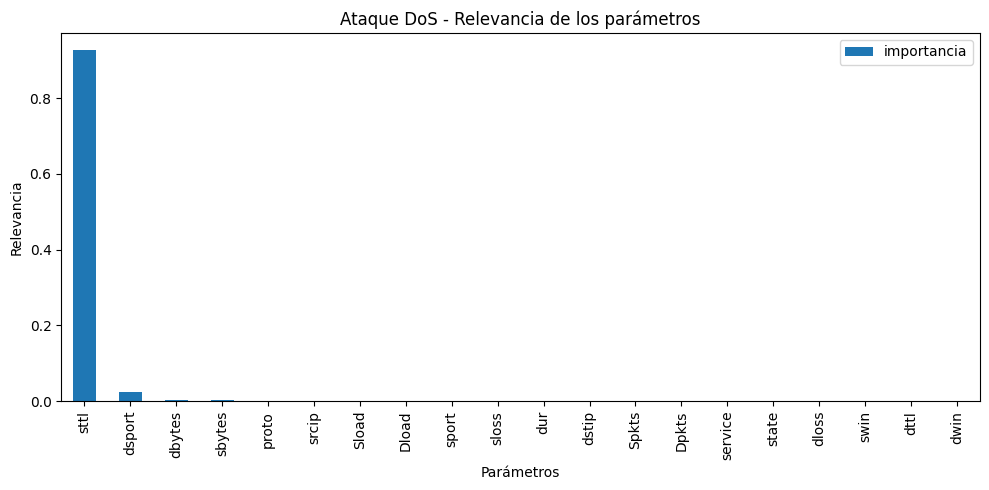

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Exploits :
Exploits 
             importancia
Parámetros             
sttl           0.929542
dsport         0.027404
sbytes         0.004697
dbytes         0.001776
proto          0.001072
srcip          0.000999
Sload          0.000856
dloss          0.000803
Dload          0.000756
sport          0.000629
sloss          0.000596
dstip          0.000465
dttl           0.000387
dur            0.000338
state          0.000312
Dpkts          0.000221
swin           0.000182
Spkts          0.000108
service        0.000061
dwin           0.000009 



Exploits=["sttl","dsport","sbytes","dbytes","proto"]


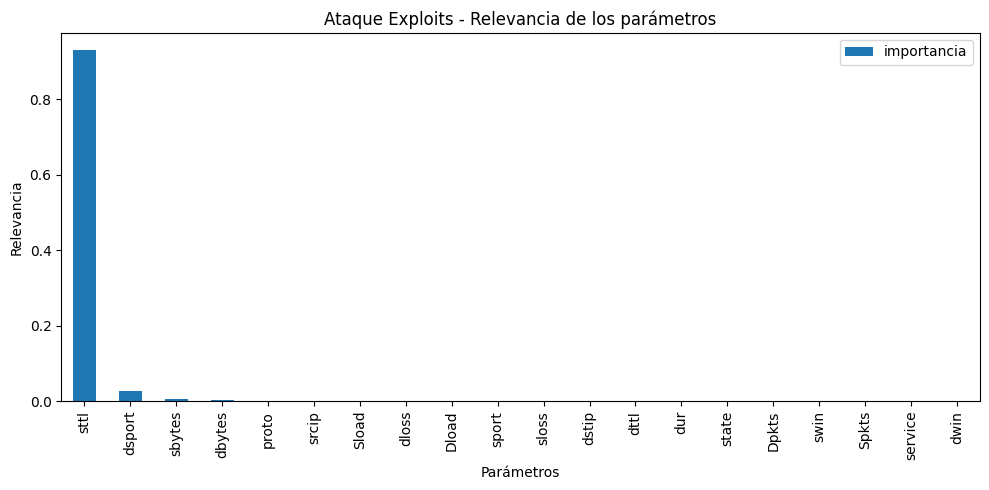

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Fuzzers :
Fuzzers 
             importancia
Parámetros             
sttl           0.949261
sloss          0.004627
sport          0.004603
Sload          0.002090
sbytes         0.001503
dstip          0.001408
dur            0.001376
Dload          0.001167
dbytes         0.000922
dsport         0.000714
proto          0.000639
srcip          0.000631
Dpkts          0.000212
Spkts          0.000199
state          0.000192
dttl           0.000153
dloss          0.000104
service        0.000087
swin           0.000032
dwin           0.000004 



Fuzzers=["sttl","sloss","sport","Sload","sbytes"]


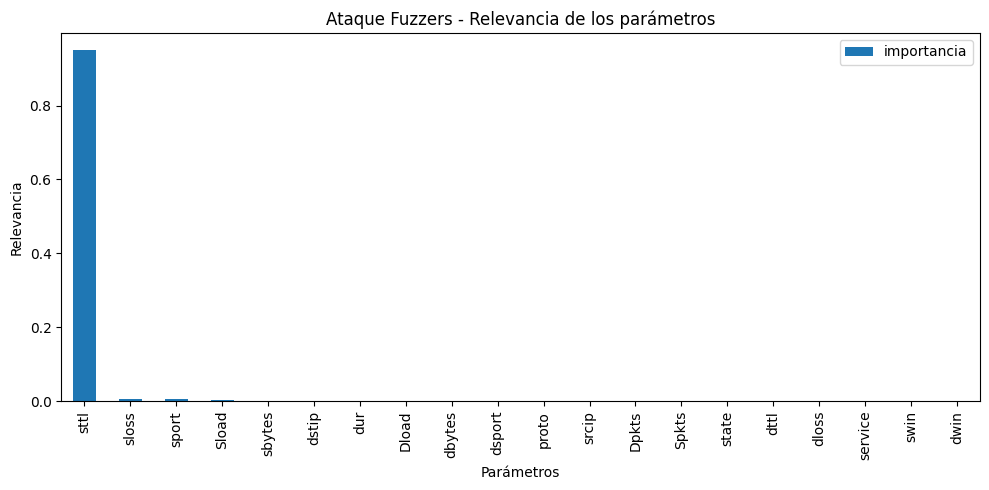

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Generic :
Generic 
             importancia
Parámetros             
service        0.018651
dbytes         0.007203
dsport         0.005746
Sload          0.000601
sbytes         0.000569
dttl           0.000495
proto          0.000374
sloss          0.000264
swin           0.000220
dloss          0.000210
dwin           0.000144
sport          0.000078
sttl           0.000071
Dload          0.000069
Dpkts          0.000059
dur            0.000044
srcip          0.000042
Spkts          0.000040
dstip          0.000027
state          0.000010 



Generic=["service","dbytes","dsport","Sload","sbytes"]


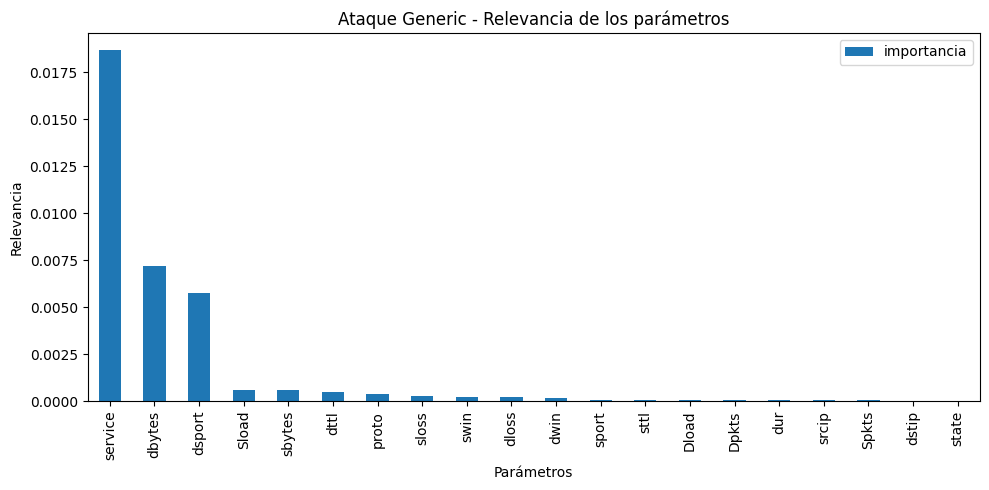

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Reconnaissance :
Reconnaissance 
             importancia
Parámetros             
sttl           0.949993
dsport         0.023367
proto          0.001591
Dpkts          0.001574
Dload          0.001566
sport          0.001166
dbytes         0.000880
dstip          0.000786
sbytes         0.000492
state          0.000134
dloss          0.000079
Sload          0.000076
dttl           0.000061
service        0.000051
dur            0.000041
srcip          0.000030
sloss          0.000018
Spkts          0.000016
swin           0.000003
dwin           0.000000 



Reconnaissance=["sttl","dsport","proto","Dpkts","Dload"]


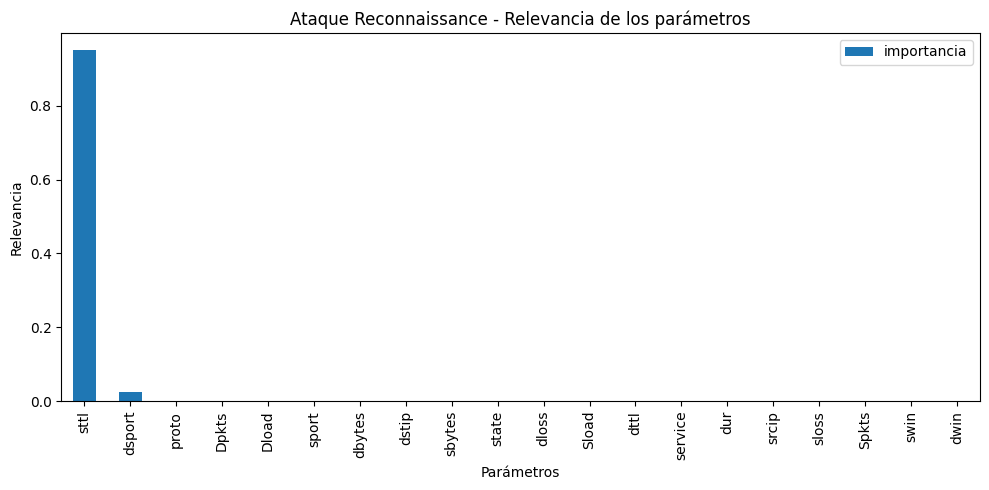

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Shellcode :
Shellcode 
             importancia
Parámetros             
sttl           0.823958
dsport         0.012884
sbytes         0.008264
dbytes         0.001093
dloss          0.000918
Dpkts          0.000666
Spkts          0.000612
service        0.000437
Sload          0.000338
sport          0.000209
dstip          0.000179
dur            0.000112
state          0.000073
Dload          0.000052
srcip          0.000011
dttl           0.000008
sloss          0.000008
swin           0.000003
proto          0.000000
dwin           0.000000 



Shellcode=["sttl","dsport","sbytes","dbytes","dloss"]


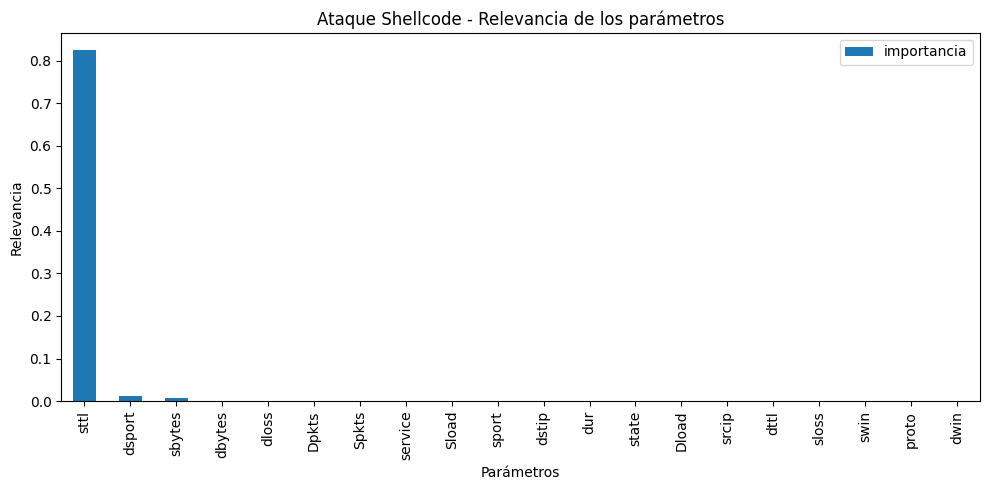

-----------------------------------------------------------------------------------------------




Lista de relevancia de parámetros para el ataque tipo  Worms :
Worms 
             importancia
Parámetros             
sttl           0.944970
dsport         0.022880
sbytes         0.003631
sport          0.000298
dstip          0.000252
sloss          0.000204
dur            0.000187
srcip          0.000167
Sload          0.000163
Dload          0.000110
dbytes         0.000075
dloss          0.000035
Dpkts          0.000022
swin           0.000000
Spkts          0.000000
dttl           0.000000
service        0.000000
state          0.000000
proto          0.000000
dwin           0.000000 



Worms=["sttl","dsport","sbytes","sport","dstip"]


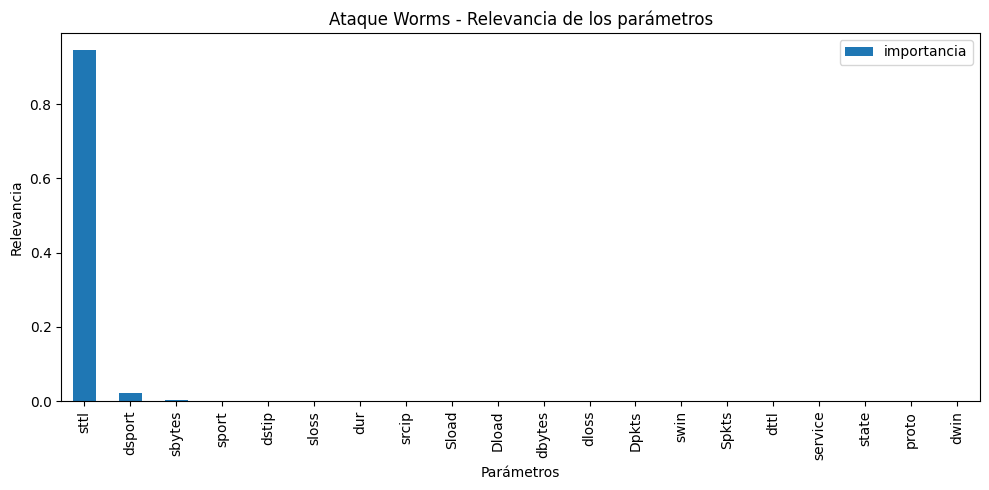

-----------------------------------------------------------------------------------------------




Procesamiento completado
Tiempo total de operación: =  1434.9565346240997 segundos


In [ ]:
#  Se requiere el directorio "attacks" (con los archivos csv de los ataques) para la ejecución de este código.
#  El directorio "attacks" debe estar ubicado en el mismo directorio que el programa.

#   El objetivo de este código es determinar qué parámetros usar en la fase de aprendizaje automático
#   Para esto, se calculan los "pesos" en cuanto a importancia para cada parámetro y cada tipo de ataque
#   Este cálculo se hace usando klearn-RandomForestRegressor.


##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #Función que crea un directorio con nombre f_name (será feature_pics)
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("No se pudo crear el directorio")
        

# Nombres de los archivos CSV:
csv_files=os.listdir("attacks") # Crea una lista con cada nombre de ataque, a partir del directorio "attacks".

# Etiquetas de cada columna
main_labels=['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 
             'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 
             'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd',
             'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','Label']

ths = open("importance_list_for_attack_files.csv", "w") #Creamos el CSV que almacene todos los datos sobre la importancia de los parámetros
folder("./feature_pics/")

for j in csv_files: #Para cada ataque:
    df=pd.read_csv(".\\attacks\\"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]: #Cambiamos la etiqueta normal a "1" y la de ataque a "0" para poder usar los datos con algoritmos de aprendizaje automático
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values


    #Calculamos las importancias de los parámetros:
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                    axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Parámetros':refclasscol[0:20],'importancia':importances[0:20]})
    impor_bars = impor_bars.sort_values('importancia',ascending=False).set_index('Parámetros')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()

    #Imprimimos las relevancias de los parámetros
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print("Lista de relevancia de parámetros para el ataque tipo ", j[0:-4],":")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title("Ataque " + j[0:-4] + " - Relevancia de los parámetros")
    plt.ylabel('Relevancia')
    #plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("Procesamiento completado")
print("Tiempo total de operación: = ",time.time()- seconds ,"segundos")
ths.close()



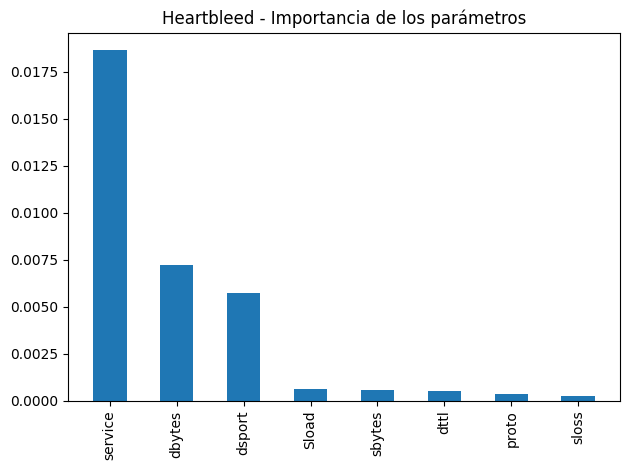

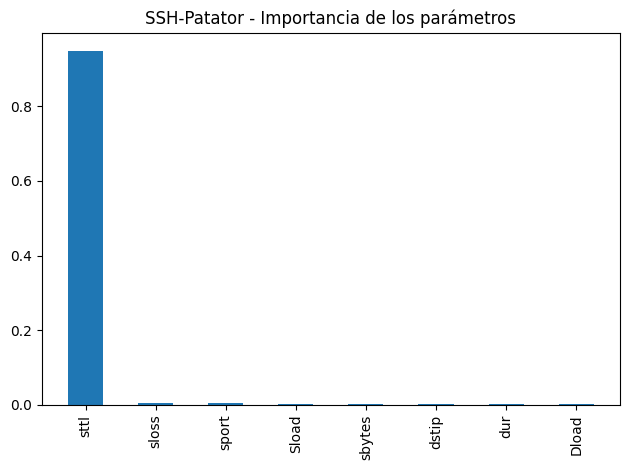

In [ ]:
#Para obtener las gráficas de la importancia de parámetros para los ejemplos en la memoria

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time


Generic={   "service":        0.018651,
            "dbytes":         0.007203,
            "dsport":         0.005746,
            "Sload":          0.000601,
            "sbytes":         0.000569,
            "dttl":           0.000495,
            "proto":          0.000374,
            "sloss":          0.000264}

Fuzzers={   "sttl":           0.949261,
            "sloss":          0.004627,
            "sport":          0.004603,
            "Sload":          0.002090,
            "sbytes":         0.001503,
            "dstip":          0.001408,
            "dur":            0.001376,
            "Dload":          0.001167}



plt.title("Heartbleed - Importancia de los parámetros")
plt.bar(range(len(Generic)), list(Generic.values()), width=0.5, align='center')
plt.xticks(range(len(Generic)), list(Generic.keys()), rotation=90)
plt.tight_layout()
plt.show()

plt.title("SSH-Patator - Importancia de los parámetros")
plt.bar(range(len(Fuzzers)), list(Fuzzers.values()), width=0.5, align='center')
plt.xticks(range(len(Fuzzers)), list(Fuzzers.keys()), rotation=90)
plt.tight_layout()
plt.show()

all_data_preproc importance list:
all_data_preproc 
             importance
Features              
dsport    3.919652e-02
sbytes    3.160460e-02
sport     3.610000e-03
Sload     2.236919e-03
dbytes    2.223939e-03
Spkts     1.921518e-03
dstip     1.914210e-03
sttl      1.599969e-03
srcip     1.247568e-03
dur       1.176933e-03
Dload     1.168667e-03
Dpkts     7.436269e-04
state     5.971882e-04
dloss     3.155930e-04
sloss     2.470063e-04
proto     2.067455e-04
service   7.600634e-05
swin      3.317435e-05
dttl      2.556569e-06
dwin      2.666614e-07 



all_data_preproc=["dsport","sbytes","sport","Sload","dbytes"]


TypeError: FigureCanvasPdf.print_pdf() got an unexpected keyword argument 'papertype'

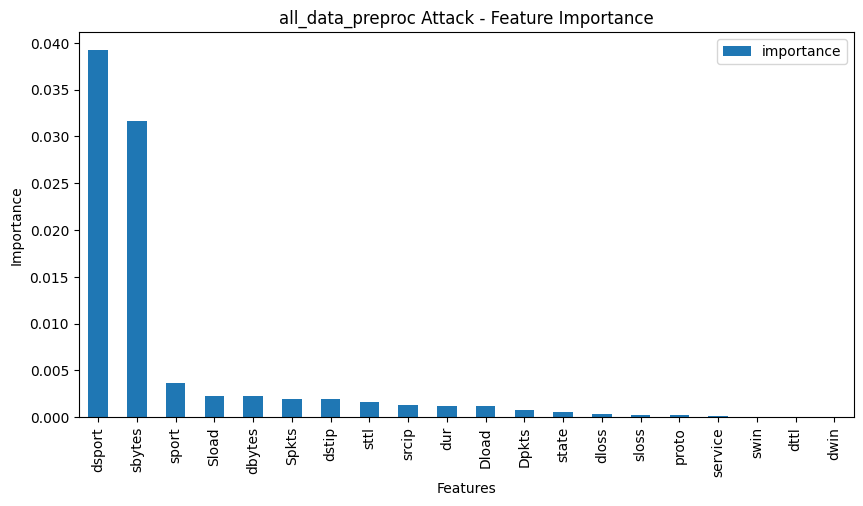

In [ ]:
#  Se requiere el archivo all_data.csv para la ejecución de este código.
#  El archivo all_data.csv debe estar ubicado en el mismo directorio que el programa.


#   El objetivo de este código es determinar qué parámetros usar en la fase de aprendizaje automático
#   Para esto, se calculan los "pesos" en cuanto a importancia para cada parámetro, para el conjunto gobal de ataques
#   Este cálculo se hace usando klearn-RandomForestRegressor.

##  the some codes parts used for calculation and graphing are taken from the following site.
##  http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): 
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# En este caso solo usamos el archivo all_data.csv:
csv_files=["all_data_preproc.csv"]

# Etiquetas de cada columna:
main_labels=['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 
             'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 
             'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_ftp_cmd',
             'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','Label']

ths = open("importance_list_all_data.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv(j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#Cambiamos la etiqueta normal a "1" y la de ataque a "0" para poder usar los datos con algoritmos de aprendizaje automático
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
   

    #Calculamos la importancia de cada parámetro:
    forest = sk.ensemble.RandomForestRegressor(n_estimators=10,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar()

    # Mostramos por pantalla las importancias de los parámetros
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+"Importancia de los parámetros sobre todo el dataset")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    #plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("Cálculo completado")
print("Tiempo total de operación: = ",time.time()- seconds ,"segundos")
ths.close()



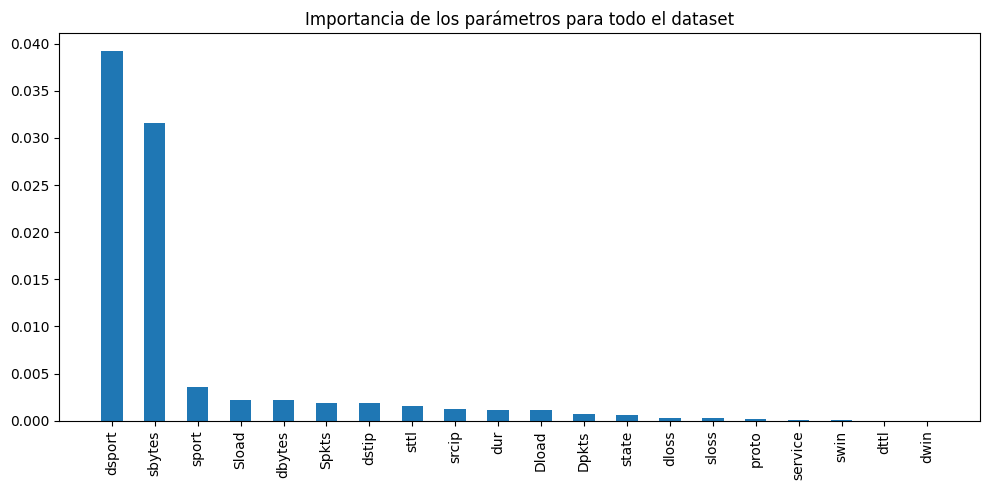

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time

all_importance = {  "dsport":    3.919652e-02,
                    "sbytes":    3.160460e-02,
                    "sport":     3.610000e-03,
                    "Sload":     2.236919e-03,
                    "dbytes":    2.223939e-03,
                    "Spkts":     1.921518e-03,
                    "dstip":     1.914210e-03,
                    "sttl":      1.599969e-03,
                    "srcip":     1.247568e-03,
                    "dur":       1.176933e-03,
                    "Dload":     1.168667e-03,
                    "Dpkts":     7.436269e-04,
                    "state":     5.971882e-04,
                    "dloss":     3.155930e-04,
                    "sloss":     2.470063e-04,
                    "proto":     2.067455e-04,
                    "service":   7.600634e-05,
                    "swin":      3.317435e-05,
                    "dttl":      2.556569e-06,
                    "dwin":      2.666614e-07 }

plt.title("Importancia de los parámetros para todo el dataset")
plt.bar(range(len(all_importance)), list(all_importance.values()), width=0.5, align='center')
plt.xticks(range(len(all_importance)), list(all_importance.keys()), rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time

all_importance = {  "dsport":    3.919652e-02,
                    "sbytes":    3.160460e-02,
                    "sport":     3.610000e-03,
                    "Sload":     2.236919e-03,
                    "dbytes":    2.223939e-03,
                    "Spkts":     1.921518e-03,
                    "dstip":     1.914210e-03,
                    "sttl":      1.599969e-03,
                    "srcip":     1.247568e-03,
                    "dur":       1.176933e-03,
                    "Dload":     1.168667e-03,
                    "Dpkts":     7.436269e-04,
                    "state":     5.971882e-04,
                    "dloss":     3.155930e-04,
                    "sloss":     2.470063e-04,
                    "proto":     2.067455e-04,
                    "service":   7.600634e-05,
                    "swin":      3.317435e-05,
                    "dttl":      2.556569e-06,
                    "dwin":      2.666614e-07 }

total_importance = sum(list(all_importance.values()))
all_rate = [i*100/total_importance for i in list(all_importance.values())]
print(all_rate)
print(sum(all_rate[0:7]))

[43.49224618982372, 35.068292897708844, 4.005636437756812, 2.4820732007508393, 2.4676706630882124, 2.132105960278558, 2.1239970430799078, 1.7753169323216977, 1.3842946923488615, 1.3059184791131409, 1.2967465703058005, 0.8251243785972691, 0.662636790614516, 0.350180282631852, 0.27407685197659015, 0.22940368646599751, 0.08433622299294545, 0.0368100789913844, 0.002836755108598198, 0.0002958860444274915]
91.77202239248687
